<a href="https://colab.research.google.com/github/szm7/AML/blob/main/AML_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

***Load DATA***

In [ ]:
data = pd.read_csv("/content/data - data.csv")

***EDA***

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
data.shape

(4600, 18)

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data['condition'].unique()

array([3, 5, 4, 2, 1])

In [ ]:
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']
fig = px.pie(data_frame=data, names=data['condition'],
              title='Condition of Houses',
              color_discrete_sequence=colors)
fig.show()

In [ ]:
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']
fig = px.pie(data_frame=data, names=data['floors'],
              title='Floors of Houses',
              color_discrete_sequence=colors)
fig.show()

In [ ]:
data['country'].unique()

array(['USA'], dtype=object)

<Axes: xlabel='bedrooms', ylabel='price'>

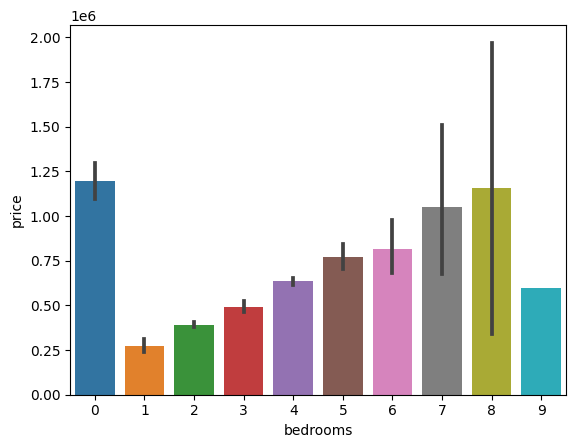

In [ ]:
price = data['price']
bedrooms = data['bedrooms']
sns.barplot(x="bedrooms", y="price", data=data)

In [ ]:
fig = px.bar(data,'city',y='price',color='price')
fig.show()

In [ ]:
fig = px.histogram(data,x='price',nbins=10,)
fig.show()

In [ ]:
fig = px.line(data,x=data.index,y='price')
fig.show()

In [ ]:
fig = px.bar(data, x='bedrooms',y=data.index, color="bedrooms")
fig.show()

In [ ]:
correlation_matrix = data.corr()

fig = px.imshow(correlation_matrix,
               x=correlation_matrix.columns,
               y=correlation_matrix.columns,

               color_continuous_scale='Viridis',
               labels=dict(color="Correlation",text_auto=True)
              )
fig.show()

<ipython-input-418-02f4edd6a338>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Binning** **by** ***Boundries***

In [ ]:
max_value = data['sqft_above'].max()
min_value = data['sqft_above'].min()

print('Maximum value:', max_value)
print('Minimum value:', min_value)

Maximum value: 9410
Minimum value: 370


In [ ]:
bin_range = [0, 1000, 2000, 3000,4000,5000,6000,7000,8000,9000,10000]
bin_label = ['0-1000', '1000-2000', '2000-3000', '3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000']
data['sqft_above_bins'] = pd.cut(data['sqft_above'], bins=bin_range, labels=bin_label)

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sqft_above_bins
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1000-2000
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3000-4000
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1000-2000
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0-1000
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1000-2000


In [ ]:
fig = px.bar(data, x='sqft_above_bins',
             y=data.index, color="sqft_above_bins")
fig.show()

# **Binning** **by** ***MEAN***

In [ ]:
data['yr_built'].unique()

array([1955, 1921, 1966, 1963, 1976, 1938, 1989, 1985, 1945, 1948, 1909,
       1980, 1939, 1965, 1956, 1997, 1987, 1983, 1923, 1954, 2005, 1991,
       1959, 1920, 1979, 1951, 1967, 2004, 2014, 1995, 1944, 1992, 1957,
       1978, 1974, 1950, 1990, 1949, 1968, 1977, 1996, 2001, 2000, 1929,
       2006, 2008, 2009, 2012, 2013, 2007, 1986, 1973, 1988, 1900, 1928,
       1982, 1960, 2003, 1998, 1942, 1908, 1958, 1971, 1975, 1961, 1924,
       1902, 1962, 1953, 1999, 1994, 1930, 1984, 2010, 1912, 1947, 1916,
       1940, 1970, 1952, 1964, 1926, 1905, 1969, 1903, 1943, 1993, 1946,
       1910, 1904, 1981, 1906, 1922, 2011, 2002, 1917, 1913, 1914, 1937,
       1925, 1932, 1918, 1972, 1941, 1919, 1936, 1911, 1927, 1931, 1901,
       1907, 1915, 1935, 1933, 1934])

In [ ]:
data['yr_built'].min()

1900

In [ ]:
data['yr_built'].max()

2014

In [ ]:
bin_range=[0,1800,1850,1900,1950,2000,2050]
bin_label=['0-1800','1800-1850','1850-1900','1900-1950','1950-2000','2000-2050',]
data['yr_built_bins']=pd.cut(data['yr_built'],bins=bin_range,labels=bin_label)

In [ ]:
bin_means = data.groupby('yr_built_bins')['yr_built'].mean()

In [ ]:
data = data.merge(bin_means, on='yr_built_bins', suffixes=('', '_mean'))

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sqft_above_bins,yr_built_bins,yr_built_mean
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1000-2000,1950-2000,1975.728617
1,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1000-2000,1950-2000,1975.728617
2,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,0-1000,1950-2000,1975.728617
3,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,1975.728617
4,02-05-2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,...,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,1975.728617


In [ ]:
data['yr_built_mean'].unique()

array([1975.72861711, 1929.76687669, 2006.81139896, 1900.        ])

In [ ]:
fig = px.bar(data, x='yr_built_mean',
             y=data.index, color="yr_built_mean")
fig.show()

# **MIN-MAX** ***Normilization***

In [ ]:
data_Mn = data.copy()

In [ ]:
df = data_Mn.sort_values(by="price")
fig = px.line(df, x="price", y=data_Mn.index, title='Price Before Normalization')
fig.show()

In [ ]:
max_value = data_Mn['bedrooms'].max()
min_value = data_Mn['bedrooms'].min()

print('Maximum value:', max_value)
print('Minimum value:', min_value)

Maximum value: 9
Minimum value: 0


In [ ]:
numeric_att = data_Mn.select_dtypes(include=['number'])
numeric_att

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,yr_built_mean
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1975.728617
1,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1975.728617
2,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,1975.728617
3,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,1975.728617
4,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,1975.728617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1010000.0,2,2.00,1460,9052,1.0,0,2,5,1460,0,1900,0,1900.000000
4596,1330000.0,3,1.50,1940,2885,1.5,0,2,3,1940,0,1900,2005,1900.000000
4597,1297000.0,6,2.75,2630,9420,2.0,0,0,5,2510,120,1900,0,1900.000000
4598,485000.0,4,1.75,1430,4096,2.0,0,0,3,1430,0,1900,2005,1900.000000


In [ ]:
normalized_data = (numeric_att - numeric_att.min()) / (numeric_att.max() - numeric_att.min())

In [ ]:
data_Mn[numeric_att.columns] = normalized_data

In [ ]:
data_Mn.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sqft_above_bins,yr_built_bins,yr_built_mean
0,02-05-2014 0:00,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,...,0.000000,0.482456,0.995531,18810 Densmore Ave N,Shoreline,WA 98133,USA,1000-2000,1950-2000,0.708994
1,02-05-2014 0:00,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,...,0.000000,0.578947,0.000000,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1000-2000,1950-2000,0.708994
2,02-05-2014 0:00,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,...,0.207469,0.552632,0.000000,857 170th Pl NE,Bellevue,WA 98008,USA,0-1000,1950-2000,0.708994
3,02-05-2014 0:00,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,0.165975,0.666667,0.989076,9105 170th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,0.708994
4,02-05-2014 0:00,0.012599,0.222222,0.25000,0.074412,0.001790,0.0,0.0,0.0,0.50,...,0.000000,0.666667,0.000000,2616 174th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,0.708994


In [ ]:
df = data_Mn.sort_values(by="price")
fig = px.line(df, x="price", y=data_Mn.index, title='Price After Normalization')
fig.show()

# ***Z-Score Normalization***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data_Zn=data.copy()

In [ ]:
df = data_Zn.sort_values(by="price")
fig = px.line(df, x="price", y=data_Zn.index, title='Price Before Normalization')
fig.show()

In [ ]:
numeric_att = data_Zn.select_dtypes(include=['number'])
numeric_att

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,yr_built_mean
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1975.728617
1,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1975.728617
2,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,1975.728617
3,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,1975.728617
4,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,1975.728617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,1010000.0,2,2.00,1460,9052,1.0,0,2,5,1460,0,1900,0,1900.000000
4596,1330000.0,3,1.50,1940,2885,1.5,0,2,3,1940,0,1900,2005,1900.000000
4597,1297000.0,6,2.75,2630,9420,2.0,0,0,5,2510,120,1900,0,1900.000000
4598,485000.0,4,1.75,1430,4096,2.0,0,0,3,1430,0,1900,2005,1900.000000


In [ ]:
scalar = StandardScaler()


In [ ]:
print(scalar.fit(numeric_att))

StandardScaler()


In [ ]:
ad = scalar.fit_transform(numeric_att)

In [ ]:
ad

array([[-0.42386353, -0.44112227, -0.84320364, ..., -0.53101376,
         1.22167046,  0.18471704],
       [-0.37242442, -0.44112227, -0.20520105, ..., -0.1609999 ,
        -0.82569345,  0.18471704],
       [-0.23407097, -0.44112227,  0.11380024, ..., -0.26191277,
        -0.82569345,  0.18471704],
       ...,
       [ 1.32151853,  2.86011815,  0.75180284, ..., -2.38108303,
        -0.82569345, -2.64561086],
       [-0.11877642,  0.6592912 , -0.52420235, ..., -2.38108303,
         1.22167046, -2.64561086],
       [ 0.08520624, -1.54153575, -1.48120623, ..., -2.38108303,
         1.22167046, -2.64561086]])

In [ ]:
data_Zn[numeric_att.columns] = pd.DataFrame(ad)

In [ ]:
data_Zn

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,sqft_above_bins,yr_built_bins,yr_built_mean
0,02-05-2014 0:00,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,...,-0.672464,-0.531014,1.221670,18810 Densmore Ave N,Shoreline,WA 98133,USA,1000-2000,1950-2000,0.184717
1,02-05-2014 0:00,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,...,-0.672464,-0.161000,-0.825693,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1000-2000,1950-2000,0.184717
2,02-05-2014 0:00,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,...,1.482306,-0.261913,-0.825693,857 170th Pl NE,Bellevue,WA 98008,USA,0-1000,1950-2000,0.184717
3,02-05-2014 0:00,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,...,1.051352,0.175376,1.208396,9105 170th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,0.184717
4,02-05-2014 0:00,-0.384841,-1.541536,-0.205201,-0.819588,-0.342596,-0.951388,-0.085004,-0.309194,-0.667112,...,-0.672464,0.175376,-0.825693,2616 174th Ave NE,Redmond,WA 98052,USA,1000-2000,1950-2000,0.184717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,24-06-2014 00:00,0.812449,-1.541536,-0.205201,-0.705374,-0.161662,-0.951388,-0.085004,2.260442,2.286416,...,-0.672464,-2.381083,-0.825693,1302 1st St,Kirkland,WA 98033,USA,1000-2000,1850-1900,-2.645611
4596,25-06-2014 00:00,1.380053,-0.441122,-0.843204,-0.206984,-0.333538,-0.022416,-0.085004,2.260442,-0.667112,...,-0.672464,-2.381083,1.221670,1228 9th Ave W,Seattle,WA 98119,USA,1000-2000,1850-1900,-2.645611
4597,01-07-2014 0:00,1.321519,2.860118,0.751803,0.509451,-0.151406,0.906555,-0.085004,-0.309194,2.286416,...,-0.413891,-2.381083,-0.825693,5529 Wallingford Ave N,Seattle,WA 98103,USA,2000-3000,1850-1900,-2.645611
4598,01-07-2014 0:00,-0.118776,0.659291,-0.524202,-0.736523,-0.299787,0.906555,-0.085004,-0.309194,-0.667112,...,-0.672464,-2.381083,1.221670,216 20th Ave,Seattle,WA 98122,USA,1000-2000,1850-1900,-2.645611


In [ ]:
df = data_Zn.sort_values(by="price")
fig = px.line(df, x="price", y=data_Zn.index, title='Price After Normalization')
fig.show()